# Grafos Aleatorios Usando Computación Cuántica

Los grafos son una estructura algebraica comúnmente estudiados en la teoría que lleva el mismo nombre, dichas estructuras hacen parte fundamental de carreras como matemáticas, ciencias de la computación, ingeniería en sistemas, entre otros; adicionalmente, encuentran aplicaciones en la física estadística, química farmaceútica, criptografía pero principalmente en las ciencias de la computación nuevamente. En el presente proyecto se realiza un estudio e interpretación con mecánica cuántica de una clase particular de grafos denominadas grafos aleatorios, dicha interpretación permite entonces el computo de los mismos a través de los circuitos cuánticos permitiendo así la construcción de diversas aplicaciones.

## Team Gatos Salvajes, Integrantes:
	-Moreno Triana, Jhon S.
	-Quevedo Farieta, Fabian F.
	-Ramos Salas, Carlos J.
	-Yepes Peñaranda, Alejandro J.

# Archivos individuales en el Git
El presente notebook es un compilado del trabajo desarrollado por el grupo a lo largo del Hackaton, si bien es posible leerse sin necesidad de revisar los demás archivos, es recomendable revisar los demás archivos en el gitHub. Estos están hecho a manera de contextualización y están relacionados con este notebook como sigue:

1. Marco teórico y justificación, Interpretación con mecánica cuántica - ```GrafosCuanticosTeoria.ipynb```.
2. Aplicación #1 - ```GeneradorCliquesAleatorios.ipynb```.
3. Aplicación #2 - ```RandomGraph.py```.
4. Aplicación #3 - ```MetodosDeEncriptacionClasicos.ipynb```, ```circuitoEncriptación.ipnb```.
5. Archivos con definiciones y funciones usadas - ```dataStructures.py```, ```util.py```.

# 1. Marco teórico y justificación

$\textbf{Definición:}$ Un grafo ($G$) es un par ordenado $(V, \ E)$ de tal manera que $V$ es el conjunto de vértices y $E \subseteq V^2$ es el conjunto de aristas, los cuales son pares de elementos del conjunto de vértices y permiten representar la operación binaria entre esos dos elementos. Algunos ejemplos de grafos son presentados a continuación.

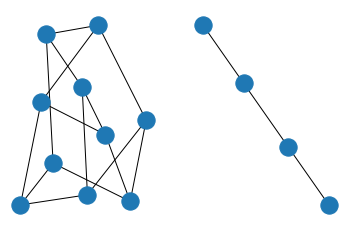

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

Grafo = nx.Graph()
Grafo.add_node("A")      # add_node("n") agrega "n" como nodo del grafo
Grafo.add_node("E")
Grafo.add_node("I")
Grafo.add_edge("A","E")  # add_edge("e") agrega "e" como borde de un nodo
Grafo.add_edge("E","I")
Grafo.add_edge("I","U")

g1 = nx.petersen_graph()


fig1 = plt.subplot(1, 2, 1)
nx.draw(g1)

fig2 = plt.subplot(1, 2, 2)
nx.draw(Grafo)

plt.show()

$\textbf{Definición:}$ Un grafo aleatorio ($G'$) es un grafo el cual puede ser generado por algún tipo de proceso aleatorio. No hay una única forma para generar un grafo aleatorio, una de las maneras para crear uno es partir de una base específica con una cantidad exacta de nodos y determinar según una probabilidad si dicho nodo está conectado con otro, naturalmente, si todos los vértices estuviesen conectados y suponiendo que hay $n$ vértices, entonces el grafo obtenido correspondería al grafo completo de $n$ vértices, lo cual denominaremos "cliques" y denotaremos por $k_n$, de igual manera, el grafo aleatorio generado con dicha base se denotará por $k'_n$. 

Cabe destacar que, dependiendo de como se defina el evento de "éxito" con la probabilidad se pueden tener diferentes bases, por ejemplo, se puede partir de tener todos los nodos fijos y con el evento de éxito de la probabilidad, se crean las aristas entre dos nodos, por otro lado, se puede partir directamente del grafo $k_n$ y el evento de éxito de la probabilidad determina si se elimina o no la arista entre dos vértices.  

A continuación se presentan ejemplos de grafos cliques.

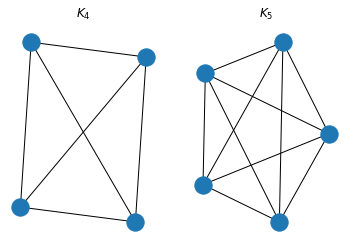

In [14]:
k4=nx.complete_graph(4)
k5=nx.complete_graph(5)



fig1 = plt.subplot(1, 2, 1)
nx.draw(k4)
fig1.set_title('$K_4$')

fig2 = plt.subplot(1, 2, 2)
nx.draw(k5)
fig2.set_title('$K_5$')


plt.show()

Otra de las bases útiles y usadas en este proyecto es la base de los árboles binarios. Se parte de un árbol binario $T$, en estos grafos habrá un nodo el cual tenga solo dos vértices vecinos, este nodo será llamado raíz y a partir de este es de donde se construyen los recorridos, en un árbol binario todos los nodos tienen dos nodos "hijos" exceptuando a aquellos vértices donde culmina el recorrido, en la siguiente línea de código se muestra un ejemplo de un árbol binario.

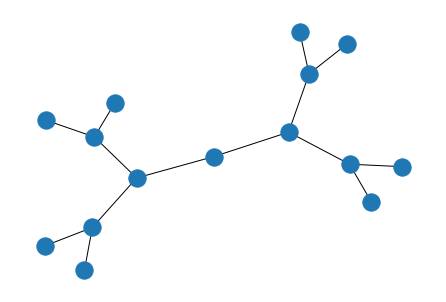

In [15]:
btree = nx.balanced_tree(2, 3)
nx.draw(btree)
plt.show()

En particular, si se trabaja con un árbol binario como base, se puede partir de la raíz y según un factor probabilístico decidir si crear la arista hacia el primer o segundo hijo, luego se continua el proceso únicamente en el nodo determinado en la paso anterior y se repite hasta llegar al final del recorrido. De esta manera si se tienen $n$ generaciones es posible crear $2^n$ posibles recorridos a partir de una misma base.

# 1.1. Interpretación con mecánica cuántica

Es bien sabido que una probabilidad de que ocurran dos sucesos complementarios puede ser descrito a través de una función de onda, por ejemplo, al lanzar una moneda se puede obtener cara o sello, si $F$ es la función de onda de la moneda, esta puede ser descrita como $|F\rangle=\sqrt{0.5}|C\rangle+\sqrt{0.5}|S\rangle$, donde los estados representan a caer cara y caer sello respectivamente. Teniendo en cuenta lo mencionado anteriormente, es posible entonces definir funciones de ondas para el caracter probabilístico de los grafos aleatorios, por ejemplo, tomando como base a la de los cliques, la función de onda que determina la existencia de una arista entre el vértice $i$ y el vértice $j$ puede ser escrita a partir de los estados "existe" ($Ex$) y "no existe" ($nEx$), así se tendría entonces $|f_{i j}\rangle=\sqrt{p}|Ex\rangle+\sqrt{1-p} \ e^{i \theta}|nEx\rangle$, siendo $p$ una probabilidad y $\theta$ la fase existente entre los estados. Es fácil observar que en esta base previamente mencionada la cantidad de funciones de onda va a ser igual a $\dfrac{n(n-1)}{2}$ donde $n$ es la cantidad de nodos.

De manera similar para la base del árbol binario con $n$ generaciones se define una función de onda $f_k$ que determina si el grafo aleatorio construyo la arista hacia el primer o segundo hijo (izquierda o derecha) en la generación $n-1$, se tendría entonces $|f_k\rangle=\sqrt{p'}|I\rangle+\sqrt{1-p'} \ e^{i \theta}|D\rangle$, donde $I$ es el estado correspondiente a tener la arista conectada al primer hijo y $D$ el correspondiente de la arista conectada al segundo hijo; en esta función de onda nuevamente se puede tomar una distribución de probabilidad $p'$ cualquiera, pero lo más común sería trabajar con $p'=0.5$. En el caso de los árboles binarios pues al tener $n$ generaciones se tendría un total de $n$ funciones de ondas diferentes.

Una ventaja de esta interpretación es la directa implicación de poder utilizar los circuitos cuánticos para generar grafos aleatorios al medir las funciones de ondas correspondientes, teniendo finalmente así la posible ejecución de cualquier aplicación de los grafos aleatorios.

# 2. Aplicaciones

# 2.1. Aplicación #1: Generador de grafos aleatorios en la base de los cliques.

En el siguiente código se define la variable $n$ la cual corresponde al número de vértices del grafo aleatorio a generar, luego se procede a crear un circuito cuántico por medio de la librería qiskit consistiendo en un qbit que pasa por una compuerta Hadamard la cual otorga probabilidad de $1/2$ a cada uno de sus estados, se realiza la medida del estado del qbit en un total de $n(n-1)/2$ de casos independientes y son asociados a las entradas de una matriz simétrica $A$ la cual corresponderá a la matriz de adyacencia del grafo. generado, finalmente se plotea el grafo

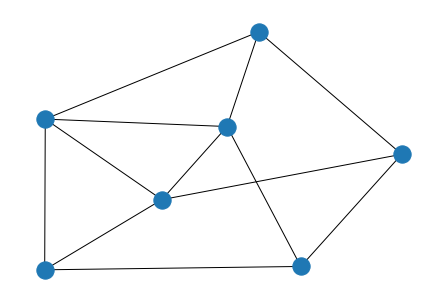

In [52]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import qiskit
from qiskit import QuantumCircuit

# Inserte acá el número de vértices del grafo a trabajar
n = 7

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure([0],[0])
# circ.draw('mpl')
SimBackend = qiskit.Aer.get_backend('qasm_simulator')

A = np.zeros((n,n))

for i in range(n):
    for j in range(i+1, n):
        Circuito = qiskit.execute(circ,backend=SimBackend,shots=1)
        A[i][j]= max(Circuito.result().get_counts(),key=Circuito.result().get_counts().get)
        A[j][i]=A[i][j]

        
G = nx.from_numpy_matrix(A)
nx.draw(G)
plt.show()

# 2.2. Aplicación #2: Generador de caminos aleatorios con un punto inicial y final fijo

En esta aplicación se trabajan con dos árboles binarios cuyas últimas generaciones se encuentran unidas a través de un factor aleatorio haciendo que cada nodo de la última generación del primer árbol se conecte a dos nodos de la última generación del segundo árbol (similar a la figura 2 mostrada en el artículo Feng Xia), la raíz del primer árbol corresponde al punto de inicio y la raíz del segundo al punto final, nuevamente utilizando un circuito cuántico dentro de un ciclo for se determinan los valores medidos de funciones de onda permitiendo así la creación de un camino aleatorio que es representado con la línea roja

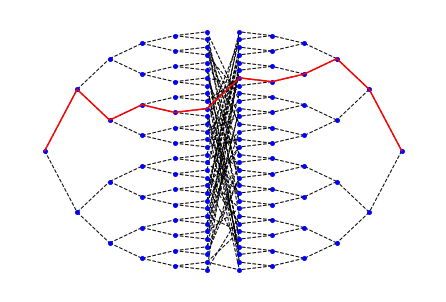

In [56]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import random
from qiskit import QuantumCircuit
import qiskit

np.random.seed(823)

n = 5

G1 = nx.balanced_tree(2,n)
G2 = nx.balanced_tree(2,n)
G3 = nx.union(G1,G2,rename=('1-','2-'))

HaveConnection = pd.Series({i:0 for i in range(2**(n)-1,2**(n+1)-1)})

def GenEdges(HaveConnection):
    return random.sample(list(HaveConnection.where(HaveConnection<2).dropna().index),2)

for i in range(2**n-1,2**(n+1)-1):
    newEdges = GenEdges(HaveConnection)
    for j in newEdges:
        G3.add_edge(f'1-{i}',f'2-{j}')
        HaveConnection[j] += 1

pos = {}
pos[f'1-0'] = (0,0.5)
pos[f'2-0'] = (1,0.5)
k = 0.5
for i in range(1,n+1):
    #print(i        /(2*n+1))
    delta = k/2
    for j in range(2**i,2**(i+1)):        
        #print(i        /(2*n+1),0.5)


        pos[f'1-{j-1}'] = (i        /(2*n+1),delta+2*delta*(j-2**i))
        pos[f'2-{j-1}'] = ((2*n-i+1)/(2*n+1),delta+2*delta*(j-2**i))
    k = delta
xs = np.linspace(0,1,12)


nx.draw(G3,pos,node_size=15,style='--',node_color='b')

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure([0],[0])
SimBackend = qiskit.Aer.get_backend('qasm_simulator')

camino = ''
ys = [0.5]
k = 0.5
for i in range(n+1):
    delta = k/2
    Circuito = qiskit.execute(circ,backend=SimBackend,shots=1)
    camino += max(Circuito.result().get_counts(),key=Circuito.result().get_counts().get)
    if i < n:
        dy = delta
        if camino[-1] == '0':dy*=-1
        ys.append(ys[-1]+dy)
    else:
        for nodename in pos:
            if nodename.startswith('1-'):
                position = pos[nodename]
                #print(type(position))
                if round(position[0],6) == round(xs[len(ys)-1],6) and round(position[1],6) == round(ys[-1],6):
                    break
        connectingnodes = pd.Series(list(G3[nodename].keys()))
        if camino[-1] == '0': 
            first2 = '2-{}'.format(min(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int')))
        else:
            first2 = '2-{}'.format(max(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int')))

        ys.append(pos[first2][1])
        for i in range(5):
            connectingnodes = pd.Series(list(G3[first2].keys()))
            #print(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int'))
            first2 = '2-{}'.format(min(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int')))

            ys.append(pos[first2][1])
    k = delta
plt.plot(xs[:len(ys)],ys,'r-')
#print(camino)
plt.savefig('CaminoAleatorioEnGrafo.pdf',bbox_inches='tight')
plt.show()

# 2.3. Aplicación #3: Encriptador cuántico ROT N

Para la aplicación del método de encriptación se usó un circuito cuántico bastante sencillo. El algoritmo procede como sigue

1. Codificar la cadena de texto que ingresa a un código binario, en este caso a cada letra se le asignó un valor numérico.
2. Configurar un circuito cuántico para cada número binario.
3. Medir los estados resultantes del circuito y anotar la distancia entre los valores asignados a la cadena ingresada y los valores obtenidos.

A través de este algorítmo, basta con conocer el recorrido o "path" para poder desencriptar el mensaje. Esto puede ser extendido para otro tipo de formas de encriptación que cambian las bases del receptor o del emisor del mensaje. La implementación del algortimo y los resultados se ven a continuación.

In [36]:
import util as ut
import numpy as np
import qiskit
import pandas as pd
%matplotlib inline
words = ["hola","qiskit","quantum"]
binaryArray = [ut.stringToBinary(i) for i in words]
circuits = [[ut.prepareCircuit(j) for j in i] for i in binaryArray]

In [34]:
simulator = qiskit.Aer.get_backend("qasm_simulator")
binaryResults=[[list(qiskit.execute(circuits[i][j], backend = simulator, shots =1).result().get_counts())[0] for j in range(len(circuits[i]))] for i in range(len(circuits))]
path = [[abs(ut.binToInt(binaryArray[i][j])-ut.binToInt(binaryResults[i][j]))%26 for j in range(len(binaryArray[i]))]for i in range(len(binaryResults))]
wordResults = ["".join([ut.ROT(ut.binToInt(binaryArray[i][j])%26,words[i][j]) for j in range(len(binaryArray[i]))]) for i in range(len(words))]
binaryWords = [" ".join(binaryResults[i]) for i in range(len(binaryResults))]

In [37]:
data = {"Palabra original" : words,
       "Encriptación en binario" : binaryWords,
       "Encriptación ROT" : wordResults,
       "Recorrido" : path}
pd.DataFrame(data)

,Palabra original,Encriptación en binario,Encriptación ROT,Recorrido
0,hola,10110 10010 10101 00011,ocwa,"[15, 4, 10, 3]"
1,qiskit,10010 00010 01111 00011 00110 11110,gqkuqm,"[2, 6, 3, 7, 2, 11]"
2,quantum,11000 00011 11101 10111 00100 11001 11011,goaamoy,"[8, 17, 3, 10, 15, 5, 15]"


Notando que el método de encriptación funciona y para devolverse con el recorrido, se hace da la misma manera que en la forma clásica del ROT, algoritmo mostrado en ```MetodosDeEncriptacionClasicos.ipynb```.

Se añade un resultado diferente al ROT y es la representación binaria dada por los estados cuánticos, esta resulta interesante pues el algoritmo puede ser extendido para carácteres especiales usando el sistema ASCII.

## Referencias:
- Xia, Feng & Liu, Jiaying & Nie, Hansong & Fu, Yonghao & Wan, Liangtian & Kong, Xiangjie. (2019). Random Walks: A Review of Algorithms and Applications. IEEE Transactions on Emerging Topics in Computational Intelligence. PP. 1-13. 10.1109/TETCI.2019.2952908. https://arxiv.org/pdf/2008.03639.pdf.